In [ ]:
import torch
torch.__version__

'1.6.0+cu101'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_data = [1., 2., 3., 4.]
y_data = [2., 4., 6., 8.]

In [ ]:
w = 0.1

In [ ]:
def forward(x):
    y_pred = x * w
    return y_pred

In [ ]:
forward(5)

0.5

In [ ]:
def loss(x,y):
    y_pred = forward(x)
    lo = (y_pred - y)**2
    return lo

In [ ]:
loss(5, 10)

90.25

In [ ]:
w_list = []
mse_list = []

for w in np.arange(0.0, 4.1, 0.1):
    print(f'W = {w}')
    total_loss = 0
    for x,y in zip(x_data, y_data):
        total_loss += loss(x,y)
    w_list.append(w)
    mse_list.append(total_loss/4)
    print(f' Loss = {total_loss/3}')

W = 0.0
 Loss = 40.0
W = 0.1
 Loss = 36.1
W = 0.2
 Loss = 32.400000000000006
W = 0.30000000000000004
 Loss = 28.899999999999995
W = 0.4
 Loss = 25.600000000000005
W = 0.5
 Loss = 22.5
W = 0.6000000000000001
 Loss = 19.599999999999994
W = 0.7000000000000001
 Loss = 16.899999999999995
W = 0.8
 Loss = 14.399999999999999
W = 0.9
 Loss = 12.1
W = 1.0
 Loss = 10.0
W = 1.1
 Loss = 8.099999999999998
W = 1.2000000000000002
 Loss = 6.399999999999996
W = 1.3
 Loss = 4.899999999999999
W = 1.4000000000000001
 Loss = 3.5999999999999983
W = 1.5
 Loss = 2.5
W = 1.6
 Loss = 1.599999999999999
W = 1.7000000000000002
 Loss = 0.8999999999999989
W = 1.8
 Loss = 0.39999999999999974
W = 1.9000000000000001
 Loss = 0.0999999999999998
W = 2.0
 Loss = 0.0
W = 2.1
 Loss = 0.10000000000000027
W = 2.2
 Loss = 0.40000000000000063
W = 2.3000000000000003
 Loss = 0.9000000000000014
W = 2.4000000000000004
 Loss = 1.6000000000000025
W = 2.5
 Loss = 2.5
W = 2.6
 Loss = 3.6000000000000014
W = 2.7
 Loss = 4.900000000000005
W

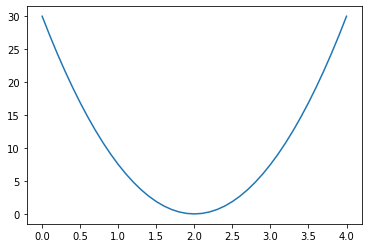

In [ ]:
plt.plot(w_list, mse_list)

In [ ]:
def gradient(x,y):
    return 2 * x * (x * w - y)

In [ ]:
gradient(2,4)

16.0

In [ ]:
w = 0.1

In [ ]:
forward(5)

0.5

In [ ]:
# SGD
for epoch in range(10):
    for x,y in zip(x_data, y_data):
        l = loss(x,y)
        w = w - 0.01 * gradient(x,y)
    print(f'After Epoch {epoch}, Loss is {l}, weight w = {w}')

After Epoch 0, Loss is 31.57058979794944, weight w = 1.044808896
After Epoch 1, Loss is 7.979139017036637, weight w = 1.5197947130732952
After Epoch 2, Loss is 2.0166446005811283, weight w = 1.7585853588599178
After Epoch 3, Loss is 0.5096859995006586, weight w = 1.8786330960040216
After Epoch 4, Loss is 0.12881784822775644, weight w = 1.9389849542015893
After Epoch 5, Loss is 0.03255737461552124, weight w = 1.9693257742332662
After Epoch 6, Loss is 0.008228538641487617, weight w = 1.9845790802239622
After Epoch 7, Loss is 0.0020796777680647215, weight w = 1.992247407691806
After Epoch 8, Loss is 0.0005256169785939998, weight w = 1.9961025225233022
After Epoch 9, Loss is 0.0001328442379048936, weight w = 1.9980406127295882


In [ ]:
forward(5)

9.990203063647941

# SGD using PyTorch

In [ ]:
x_data = [1., 2., 3., 4.]
y_data = [2., 4., 6., 8.]
w = torch.tensor(0.1, requires_grad=True)

In [ ]:
def forward(x):
    y_pred = x * w
    return y_pred

In [ ]:
# SGD
for epoch in range(10):
    for x,y in zip(x_data, y_data):
        l = loss(x,y)
        #w = w - 0.01 * gradient(x,y)
        l.backward()
        with torch.no_grad():
            w.data = w.data - 0.01 * w.grad
            w.grad.zero_()
    print(f'After Epoch {epoch}, Loss is {l}, weight w = {w}')

After Epoch 0, Loss is 860.3873291015625, weight w = 6.986501216888428
After Epoch 1, Loss is 217.4539794921875, weight w = 4.5068745613098145
After Epoch 2, Loss is 54.95924377441406, weight w = 3.260286569595337
After Epoch 3, Loss is 13.890381813049316, weight w = 2.6335866451263428
After Epoch 4, Loss is 3.5106520652770996, weight w = 2.3185245990753174
After Epoch 5, Loss is 0.887280285358429, weight w = 2.16013240814209
After Epoch 6, Loss is 0.22425036132335663, weight w = 2.0805037021636963
After Epoch 7, Loss is 0.05667710304260254, weight w = 2.0404717922210693
After Epoch 8, Loss is 0.01432454027235508, weight w = 2.0203464031219482
After Epoch 9, Loss is 0.0036203351337462664, weight w = 2.0102288722991943


# Why Zero gradient in Pytorch

In [ ]:
x = torch.tensor(2., requires_grad=True)
y = 4* x**2

In [ ]:
y.backward(retain_graph=True)
x.grad

tensor(16.)

In [ ]:
y.backward(retain_graph=True)
x.grad

tensor(16.)

In [ ]:
x.grad.zero_()

tensor(0.)

# Why Activation functions

In [ ]:
def plot_activations(func, range=(-10,10)):
    x = torch.linspace(range[0], range[1])
    y = func(x)
    plt.plot(x,y)

In [ ]:
torch.sigmoid??

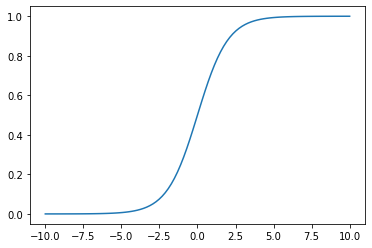

In [ ]:
plot_activations(torch.sigmoid)

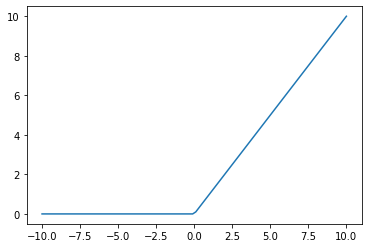

In [ ]:
plot_activations(torch.relu)

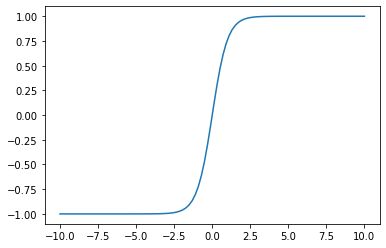

In [ ]:
plot_activations(torch.tanh)

In [ ]:
x = torch.linspace(-10,10)
x

tensor([-10.0000,  -9.7980,  -9.5960,  -9.3939,  -9.1919,  -8.9899,  -8.7879,
         -8.5859,  -8.3838,  -8.1818,  -7.9798,  -7.7778,  -7.5758,  -7.3737,
         -7.1717,  -6.9697,  -6.7677,  -6.5657,  -6.3636,  -6.1616,  -5.9596,
         -5.7576,  -5.5556,  -5.3535,  -5.1515,  -4.9495,  -4.7475,  -4.5455,
         -4.3434,  -4.1414,  -3.9394,  -3.7374,  -3.5354,  -3.3333,  -3.1313,
         -2.9293,  -2.7273,  -2.5253,  -2.3232,  -2.1212,  -1.9192,  -1.7172,
         -1.5152,  -1.3131,  -1.1111,  -0.9091,  -0.7071,  -0.5051,  -0.3030,
         -0.1010,   0.1010,   0.3030,   0.5051,   0.7071,   0.9091,   1.1111,
          1.3131,   1.5152,   1.7172,   1.9192,   2.1212,   2.3232,   2.5253,
          2.7273,   2.9293,   3.1313,   3.3333,   3.5354,   3.7374,   3.9394,
          4.1414,   4.3434,   4.5455,   4.7475,   4.9495,   5.1515,   5.3535,
          5.5556,   5.7576,   5.9596,   6.1616,   6.3636,   6.5657,   6.7677,
          6.9697,   7.1717,   7.3737,   7.5758,   7.7778,   7.97

In [ ]:
a = torch.tanh(5 *x -2)
b = torch.tanh(x*20 - 19)
c = torch.tanh(x*3 + 10)
d = a * b
e = b * c
f = a * b * c

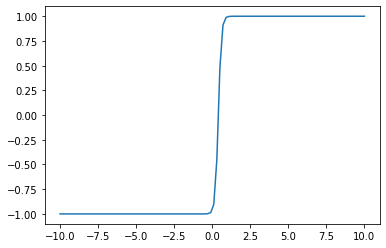

In [ ]:
plt.plot(x,a)

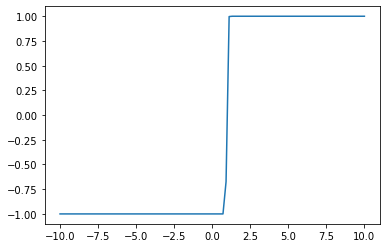

In [ ]:
plt.plot(x,b)

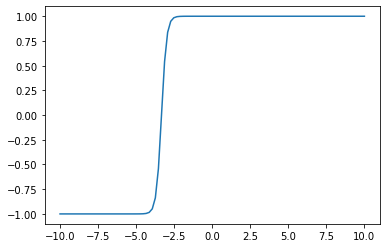

In [ ]:
plt.plot(x,c)

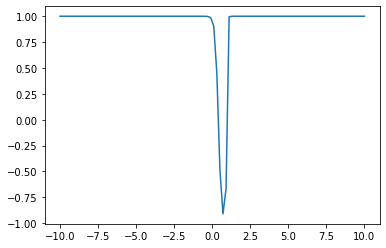

In [ ]:
plt.plot(x,d)

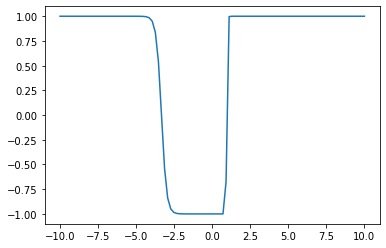

In [ ]:
plt.plot(x,e)